# importing libraries

In [5]:
import torch
import torch.nn as nn
import torch.optim
from torchvision import datasets,transforms
from torch.utils.data import DataLoader

# transformations

In [6]:
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))
    ])

# data loading

In [9]:
train_dataset=datasets.MNIST(root='./data',train=True,transform=transform,download=True)
test_dataset=datasets.MNIST(root='./data',train=False,transform=transform,download=True)

100.0%
100.0%
100.0%
100.0%


# data loaders

In [11]:
train_loader=DataLoader(train_dataset,batch_size=64,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=64,shuffle=False)

# defining architecture

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder,self).__init__()
        #Encoder
        self.encoder=nn.Sequential(
            nn.Conv2d(1,16,3,stride=2,padding=1),
            nn.ReLU(True),
            nn.Conv2d(16,32,3,stride=2,padding=1),
            nn.ReLU(True)       
        )

        #Decoder
        self.decoder=nn.Sequential(
            nn.ConvTranspose2d(32,16,3,stride=2,padding=1,output_padding=1),
            nn.ReLU(True),
            nn.ConvTranspose2d(16,1,3,stride=2,padding=1,output_padding=1),
            nn.Tanh()
        )
    def forward(self,x):
        x=self.encoder(x)
        x=self.decoder(x)
        return x


In [29]:
model=Autoencoder()

In [30]:
criterian=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.0001)

# add noise function

In [31]:
def add_noise(img):
    noisy=img+0.5*torch.randn_like(img)
    noise=torch.clamp(noisy,-1.,1.)
    return noisy

# train

In [32]:
for epoch in range(30):
    model.train()
    running_loss=0.0
    for img,_ in train_loader:
        noisy_img=add_noise(img)
        output=model(noisy_img)
        loss=criterian(output,img)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()*img.size(0)


# Evaluation

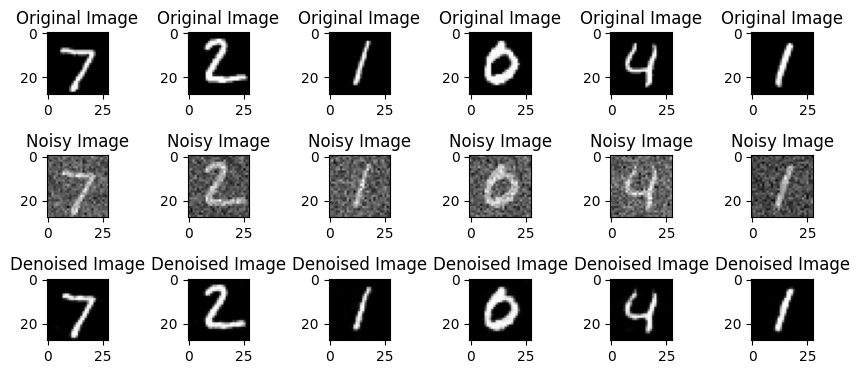

In [41]:
model.eval()
with torch.no_grad():
    for img,_ in test_loader:
        noisy_img=add_noise(img)
        output=model(noisy_img)
        break
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
for i in range(6):
    plt.subplot(3,6,i+1)
    plt.imshow(img[i].squeeze(),cmap='gray')
    plt.title('Original Image')
    plt.subplot(3,6,i+7)
    plt.imshow(noisy_img[i].squeeze(),cmap='gray')
    plt.title('Noisy Image')
    #plt.axis('off')
    plt.subplot(3,6,i+13)
    plt.imshow(output[i].squeeze(),cmap='gray')
    plt.title('Denoised Image')
    #plt.axis('off')
plt.subplots_adjust(wspace=1,hspace=1)
plt.show()
